## Actividad

- Obten datos con yfinance de 5 empresas desde 2022.
- Graficar los precios de cierre.
- Obten el precio de cierre promedio por acción.
- Obten los días que Netflix cotizo por encima de su precio de cierre promedio.
- Obtén para cada empresa, los 10 días que tuvo su mayor precio.
- Si hubieras invertido 100 dólares en cada empresa al inicio, cuánto tendrías por empresa hoy? Asume compras fraccionadas.


In [73]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [74]:
# Instrucción 1
data = yf.download(['AAPL','NVDA','NFLX','V','GOOGL'], start='2022-01-01')['Adj Close']

[*********************100%***********************]  5 of 5 completed


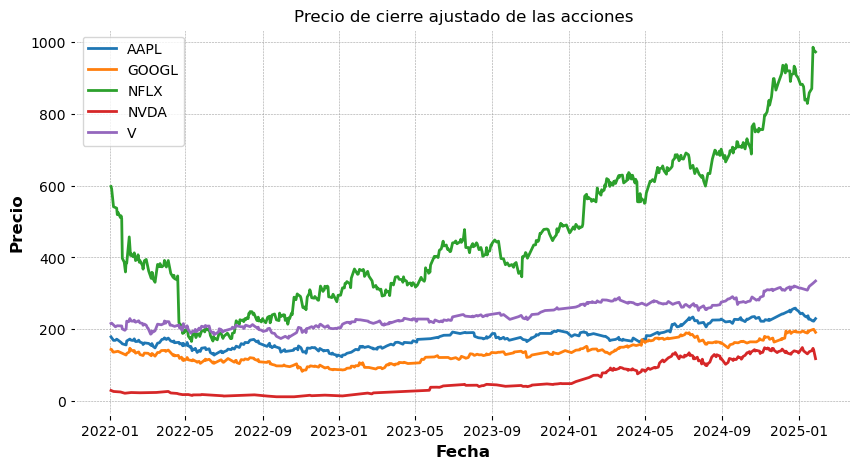

In [75]:
# Instrucción 2
plt.figure(figsize=(10,5))
plt.plot(data, label=data.keys())
plt.title('Precio de cierre ajustado de las acciones')
plt.ylabel('Precio')
plt.xlabel('Fecha')
plt.legend();

In [76]:
#Instrucción 3 como dataframe
pd.DataFrame(data.mean(), columns=['Mean']).T

Ticker,AAPL,GOOGL,NFLX,NVDA,V
Mean,178.17126,133.398596,458.311261,56.147918,239.835772


In [77]:
# como vector
data.mean().values

array([178.17126045, 133.39859637, 458.3112613 ,  56.14791774,
       239.83577215])

In [78]:
# Instucción 4
netflix = pd.DataFrame(data.NFLX)
netflix.query('NFLX > NFLX.mean()')

,NFLX
Date,
2022-01-03 00:00:00+00:00,597.369995
2022-01-04 00:00:00+00:00,591.150024
2022-01-05 00:00:00+00:00,567.520020
2022-01-06 00:00:00+00:00,553.289978
2022-01-07 00:00:00+00:00,541.059998
...,...
2025-01-21 00:00:00+00:00,869.679993
2025-01-22 00:00:00+00:00,953.989990
2025-01-23 00:00:00+00:00,984.859985


In [79]:
# Instrucción 5
data['AAPL'].nlargest(10)

Date
2024-12-26 00:00:00+00:00    259.019989
2024-12-24 00:00:00+00:00    258.200012
2024-12-27 00:00:00+00:00    255.589996
2024-12-23 00:00:00+00:00    255.270004
2024-12-20 00:00:00+00:00    254.490005
2024-12-17 00:00:00+00:00    253.479996
2024-12-30 00:00:00+00:00    252.199997
2024-12-16 00:00:00+00:00    251.039993
2024-12-31 00:00:00+00:00    250.419998
2024-12-19 00:00:00+00:00    249.789993
Name: AAPL, dtype: float64

In [80]:
data['NVDA'].nlargest(10)

Date
2025-01-06 00:00:00+00:00    149.429993
2024-11-07 00:00:00+00:00    148.869751
2024-11-12 00:00:00+00:00    148.279770
2024-11-08 00:00:00+00:00    147.619827
2025-01-23 00:00:00+00:00    147.220001
2025-01-22 00:00:00+00:00    147.070007
2024-11-19 00:00:00+00:00    146.999863
2024-11-14 00:00:00+00:00    146.749878
2024-11-21 00:00:00+00:00    146.659897
2024-11-13 00:00:00+00:00    146.259918
Name: NVDA, dtype: float64

In [81]:
data['NFLX'].nlargest(10)

Date
2025-01-23 00:00:00+00:00    984.859985
2025-01-24 00:00:00+00:00    977.590027
2025-01-27 00:00:00+00:00    971.890015
2025-01-22 00:00:00+00:00    953.989990
2024-12-11 00:00:00+00:00    936.559998
2024-12-06 00:00:00+00:00    934.739990
2024-12-24 00:00:00+00:00    932.119995
2024-12-12 00:00:00+00:00    925.549988
2024-12-26 00:00:00+00:00    924.140015
2024-12-16 00:00:00+00:00    921.080017
Name: NFLX, dtype: float64

In [82]:
data['V'].nlargest(10)

Date
2025-01-27 00:00:00+00:00    334.540009
2025-01-24 00:00:00+00:00    330.200012
2025-01-23 00:00:00+00:00    328.209991
2025-01-21 00:00:00+00:00    323.630005
2025-01-22 00:00:00+00:00    323.559998
2024-12-26 00:00:00+00:00    320.910004
2024-12-24 00:00:00+00:00    320.649994
2025-01-17 00:00:00+00:00    319.619995
2024-12-27 00:00:00+00:00    318.660004
2024-12-17 00:00:00+00:00    318.299988
Name: V, dtype: float64

In [83]:
data['GOOGL'].nlargest(10)

Date
2025-01-24 00:00:00+00:00    200.210007
2025-01-22 00:00:00+00:00    198.369995
2025-01-21 00:00:00+00:00    198.050003
2025-01-23 00:00:00+00:00    197.979996
2025-01-06 00:00:00+00:00    196.869995
2024-12-16 00:00:00+00:00    196.660004
2024-12-24 00:00:00+00:00    196.110001
2025-01-17 00:00:00+00:00    196.000000
2024-12-26 00:00:00+00:00    195.600006
2025-01-15 00:00:00+00:00    195.550003
Name: GOOGL, dtype: float64

In [94]:
# Instrucción 6

ret = data.iloc[-1]/data.iloc[0] - 1
100*(1+ret)

Ticker
AAPL     128.358469
GOOGL    132.770079
NFLX     162.694816
NVDA     393.801517
V        154.606087
dtype: float64